In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
from datetime import date

# Data Explanation

Data from : https://www.kaggle.com/shahz001/cardekho-dataset

'name' : brand and model of car.

'year': production year of car.

'selling_price': price of car.

'km_driven': km driven would refer to how much distance (in kilometres) the car had travelled.

'fuel': fuel.

'seller_type': who is selling the car?

'transmission': A car transmission is one of the most important components of a vehicle. It’s what moves the power from the engine to the wheels. 

'owner': who is property?

'mileage': Mileage refers to the distance that you have travelled, measured in miles.

'engine': Engine size is the volume of fuel and air that can be pushed through a car’s cylinders and is measured in cubic centimetres (cc). Car engine sizes are normally specified in litres, which is rounded up to the nearest tenth of a litre. For example, a car that has a 1390cc engine would be described as a 1.4 litre.

'max_power': Power is defined as the rate at which an object does work. In the context of automobiles, power is often described as horsepower. A vehicle with more power ideally will have better acceleration and higher top speed.


'torque': Torque is a rotating or twisting force produced by an engine’s crankshaft. In simpler terms, torque can be defined as an engine's 'pulling force' and helps a vehicle with initial acceleration. This is why heavier vehicles like SUVs often use engines that deliver a high amount of torque. High torque helps a powerplant perform with ease especially when a vehicle is transporting heavy loads or moving up steep inclines. 


'seats':  How many seats are there?

## 1.Data Reading & Manipulation

In [11]:
#The extension of the workspace.
pwd = os.getcwd();

In [12]:
car_data = pd.read_csv( pwd + '\\car_data.csv')

In [13]:
car_data_modified = car_data.copy()

In [14]:
car_data_modified.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [15]:
car_data_modified.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


1.1.The "selling_price" will be predicted on a brand-car basis.

In [16]:
CompanyName = car_data_modified['name'].apply(lambda x : x.split(' ')[0])
car_data_modified.insert(0, "CompanyName", CompanyName)

In [17]:
car_data_modified.drop(['name'],axis=1,inplace=True)

1.2.Numeric values from strings.

In [18]:
def delete_char(dframe, column, n=0, m=None):
    """string değerlerden sayısal verilerin çekilmesi.
    """
    dframe[column] = pd.to_numeric(dframe[column].str[n:m], errors='coerce')
    return dframe[column]

1.2.1."max_power" to numeric "max_power".

In [19]:
delete_char(car_data_modified, "max_power", m=-4)

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8128, dtype: float64

1.2.2. "mileage" to numeric "mileage".

In [20]:
delete_char(car_data_modified, "mileage", m=-5)

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 8128, dtype: float64

1.2.3."engine" to numeric "engine".

In [21]:
delete_char(car_data_modified, "engine", m=-2)

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
8123    1197.0
8124    1493.0
8125    1248.0
8126    1396.0
8127    1396.0
Name: engine, Length: 8128, dtype: float64

In [22]:
car_data_modified.drop(columns='torque', inplace=True)

1.3. Calculating age of cars.

In [23]:
todays_date = date.today()
car_data_modified.year = todays_date.year - car_data_modified.year

1.4. drop "km_driven"

It has same meaning of "mileage".

In [24]:
car_data_modified.drop(columns="km_driven", inplace=True)

In [25]:
car_data_modified.describe() 

,year,selling_price,mileage,engine,max_power,seats
count,8128.000000,8.128000e+03,7907.000000,7907.000000,7906.000000,7907.000000
mean,8.195989,6.382718e+05,19.418783,1458.625016,91.587374,5.416719
std,4.044249,8.062534e+05,4.037145,503.916303,35.747216,0.959588
min,2.000000,2.999900e+04,0.000000,624.000000,32.800000,2.000000
25%,5.000000,2.549990e+05,16.780000,1197.000000,68.050000,5.000000
50%,7.000000,4.500000e+05,19.300000,1248.000000,82.000000,5.000000
75%,11.000000,6.750000e+05,22.320000,1582.000000,102.000000,5.000000
max,39.000000,1.000000e+07,42.000000,3604.000000,400.000000,14.000000


High "mileage" is not good for cars(high score penalty.)

In [26]:
temp= car_data_modified.copy()
bins = [0,16,22,42]
cars_bin=['High', 'Medium' ,'Low']
car_data_modified['MileAgeLevels'] = pd.cut(temp['mileage'],bins,right=False,labels=cars_bin)
car_data_modified.MileAgeLevels.cat.set_categories(['Low', 'Medium' ,'High'], ordered=True, inplace=True)

C:\Users\Gaye\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


## 2. Visualising Categorical Data

In [27]:
for i in car_data_modified.columns:
    if car_data_modified[i].dtype == object:
        print( i, ":",car_data_modified[i].nunique())

CompanyName : 32
fuel : 4
seller_type : 3
transmission : 2
owner : 5


In [28]:
for i in car_data_modified.columns:
    if car_data_modified[i].dtype == object:
        print( f"--{i}--", "\n",car_data_modified[i].unique(),"\n")

--CompanyName-- 
 ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot'] 

--fuel-- 
 ['Diesel' 'Petrol' 'LPG' 'CNG'] 

--seller_type-- 
 ['Individual' 'Dealer' 'Trustmark Dealer'] 

--transmission-- 
 ['Manual' 'Automatic'] 

--owner-- 
 ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car'] 



In [29]:
def bar_chart(df, column):
    if df[column].unique().size >10:
        plt.figure(figsize=(20, 10))
    else:
        plt.figure(figsize=(10, 7.5))
            
    plt1 = df[column].value_counts().plot(kind='bar')
    plt.title(f"{column} Bar Chart")
    plt1.set(xlabel = f"{column}", ylabel=f'Frequency of {column}')
    
    for p in plt1.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        plt1.annotate((f"{round((height / len(df[column]))*100, 2)}")+" %", (x + width/2, y + height*1.02), ha='center')
    
    plt.show()

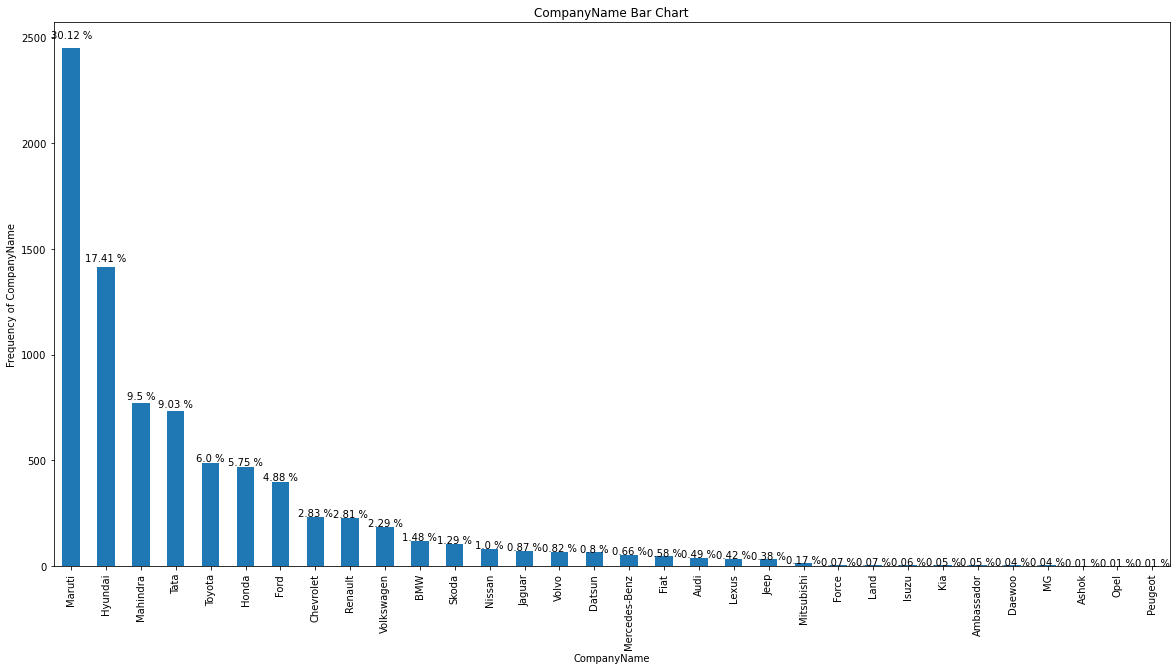

In [30]:
#CompanyName
bar_chart(car_data_modified, "CompanyName")

Inference: According to the data we have, the most "Maruti" brand cars were sold.

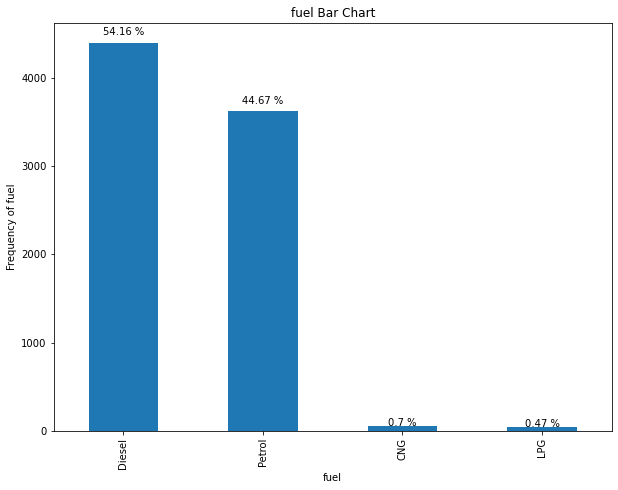

In [31]:
#fuel
bar_chart(car_data_modified, "fuel")

Inference: "Diesel" were preferred the most in car sales with 54.16 %. Almost all of the cars sold (98.83%) consist of "Petrol" and "Diesel" fuel types.

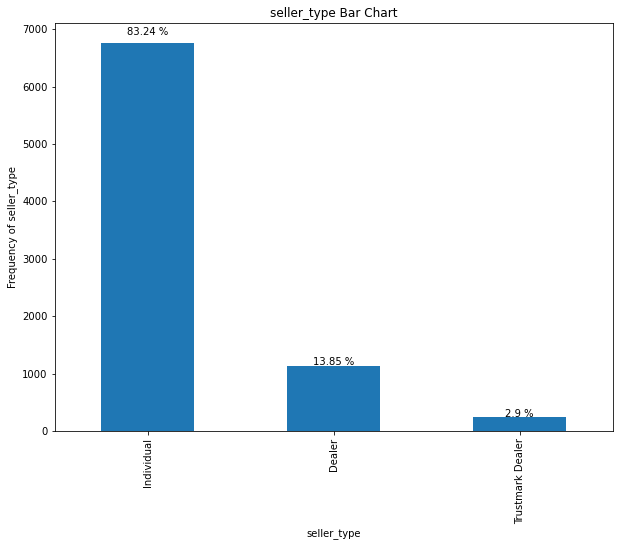

In [32]:
#seller_type
bar_chart(car_data_modified, "seller_type")

Inference: According to the data we have, buyers largely prefer "individual" sellers. This rate may also be due to the poor or scarcity of "dealer" services. We can say that individual sellers are more trusted.

In [33]:
car_data_modified.drop(columns="seller_type", inplace=True)

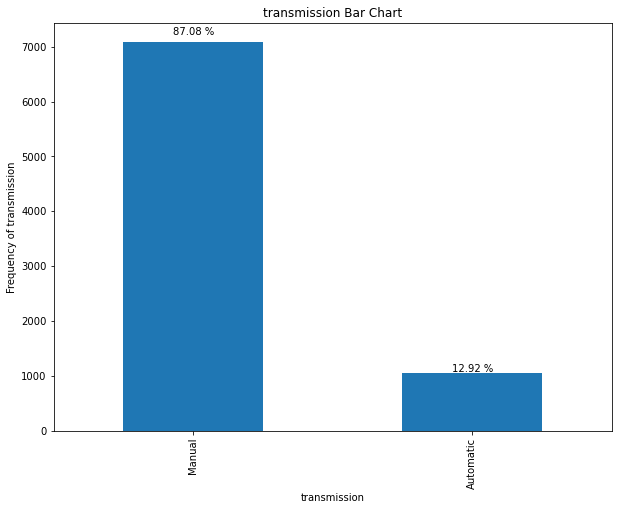

In [34]:
#transmission
bar_chart(car_data_modified, "transmission")

Inference: According to the data we have, It seems that buyers mostly preferred vehicles with manual transmission.

In [35]:
car_data_modified.drop(columns="transmission", inplace=True)

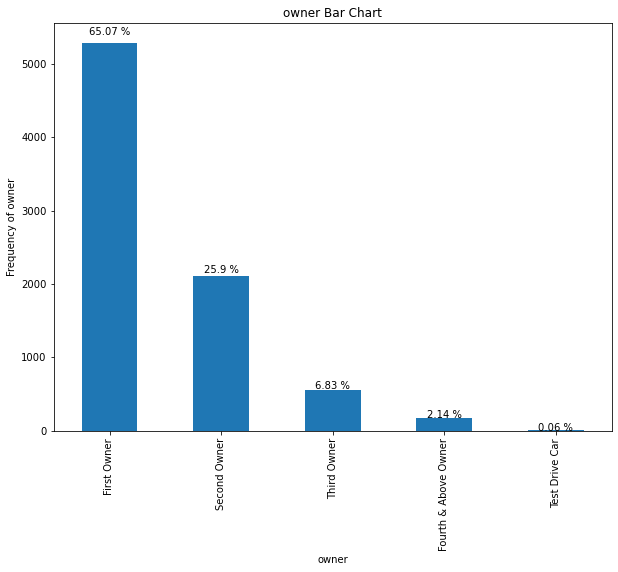

In [36]:
#owner
bar_chart(car_data_modified, "owner")

Inference: More than half of buyers bought cars from the first seller.

From this, it can be deduced that less changed hands are preferred.

In [37]:
car_data_modified.seats.unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

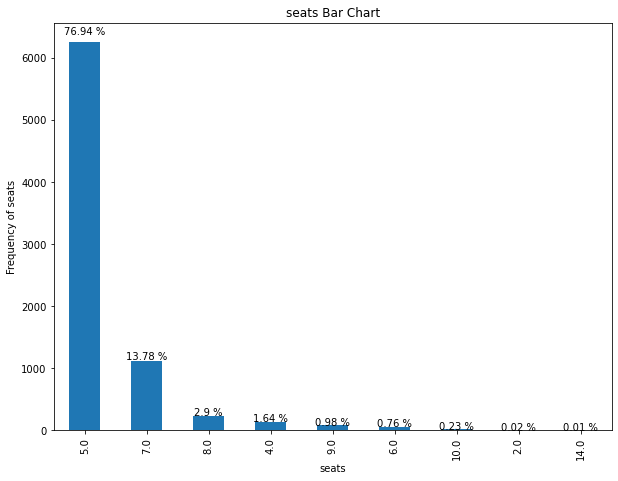

In [38]:
#seats
bar_chart(car_data_modified, "seats")

## 3.Visualising Numeric Data

In [39]:
for i in car_data_modified.columns:
    if car_data_modified[i].dtype != object :
        print( f"{i} : ",car_data_modified[i].dtypes)

#"seats" değişkeni kategorik veri olarak değerlendirildi.

year :  int64
selling_price :  int64
mileage :  float64
engine :  float64
max_power :  float64
seats :  float64
MileAgeLevels :  category


The numerical variables were analyzed with box plot and distribution plot. Outliers have been cleared to get a better model result as a result of the analysis.

Source: https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

In [40]:
# Standard Deviation Method for Gaussian Distribution

def del_gaus(df, col):
    col_mean, col_std = np.mean(df[col]), np.std(df[col])
    cut_off = col_std * 3
    lower, upper = col_mean- cut_off, col_mean+cut_off
    print(f"with outliers: {df[col].size}")
    df.drop(df[(df[col] < lower) | (df[col] > upper)].index, inplace=True)
    print(f"non-outliers: {df[col].size}")

In [41]:
# Interquartile Range Method for non-Gaussian Distribution

def del_iqr(df, col):
    col_q25, col_q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = col_q75 - col_q25
    cut_off = iqr * 1.5
    lower, upper = col_q25 - cut_off, col_q75 + cut_off
    print(f"with outliers: {df[col].size}")
    df.drop(df[(df[col] < lower) | (df[col] > upper)].index, inplace=True)
    print(f"non-outliers: {df[col].size}")


In [42]:
def dist_box_plot(df, column):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.title(f'{column} Distribution Plot')
    sns.distplot(df[column])

    plt.subplot(1,2,2)
    plt.title(f'{column} Box Plot')
    sns.boxplot(y=df[column])

    plt.show()
    

3.1. Age of cars

C:\Users\Gaye\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


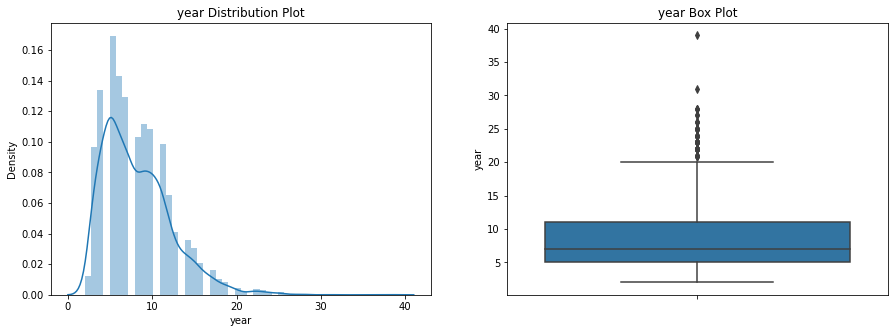

In [43]:
dist_box_plot(car_data_modified, "year")

"year" is a right-skewed (del_iqr function).

In [44]:
del_iqr(car_data_modified, "year")

with outliers: 8128
non-outliers: 8047


3.3. mileage

C:\Users\Gaye\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


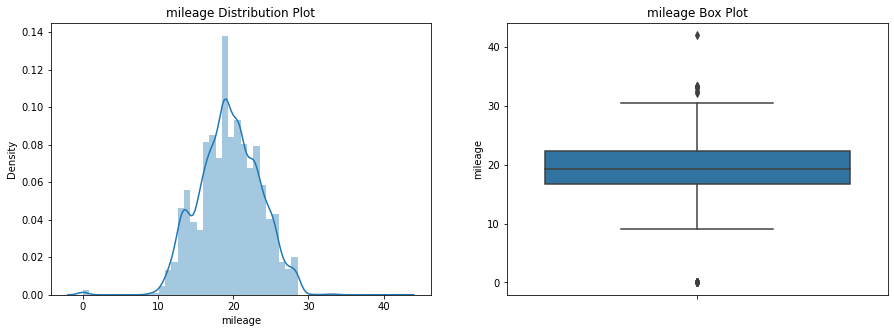

In [45]:
dist_box_plot(car_data_modified, "mileage")

In [46]:
car_data_modified.describe()

,year,selling_price,mileage,engine,max_power,seats
count,8047.000000,8.047000e+03,7848.000000,7848.000000,7848.000000,7848.000000
mean,8.041258,6.438641e+05,19.443619,1462.022044,91.904609,5.422273
std,3.748366,8.083436e+05,4.039634,503.212891,35.663625,0.956595
min,2.000000,3.150400e+04,0.000000,624.000000,32.800000,2.000000
25%,5.000000,2.600000e+05,16.800000,1197.000000,68.070000,5.000000
50%,7.000000,4.500000e+05,19.330000,1248.000000,82.000000,5.000000
75%,10.000000,6.800000e+05,22.320000,1582.000000,102.000000,5.000000
max,20.000000,1.000000e+07,42.000000,3604.000000,400.000000,14.000000


"mileage" is symmetric(del_gaus function).

In [47]:
del_gaus(car_data_modified, "mileage")

with outliers: 8047
non-outliers: 8023


3.4. engine

C:\Users\Gaye\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


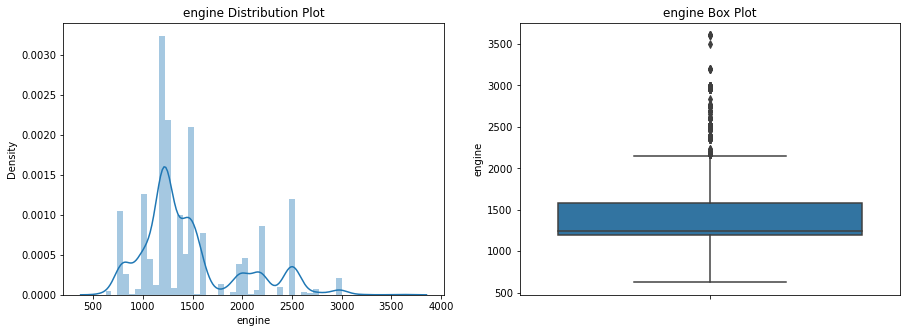

In [48]:
dist_box_plot(car_data_modified, "engine")

"engine" is a right-skewed (del_iqr function).

In [49]:
del_iqr(car_data_modified,"engine")

with outliers: 8023
non-outliers: 8023


In [50]:
car_data_modified.engine

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
8123    1197.0
8124    1493.0
8125    1248.0
8126    1396.0
8127    1396.0
Name: engine, Length: 8023, dtype: float64

3.5. max_power

C:\Users\Gaye\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


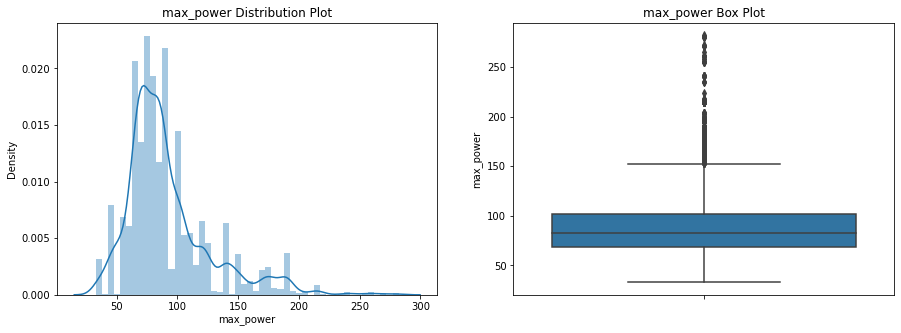

In [51]:
dist_box_plot(car_data_modified, "max_power")

"max_power" is not symmetric(del_gaus function).

In [52]:
del_iqr(car_data_modified,"max_power")

with outliers: 8023
non-outliers: 8023


3.6 "selling_price"

C:\Users\Gaye\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


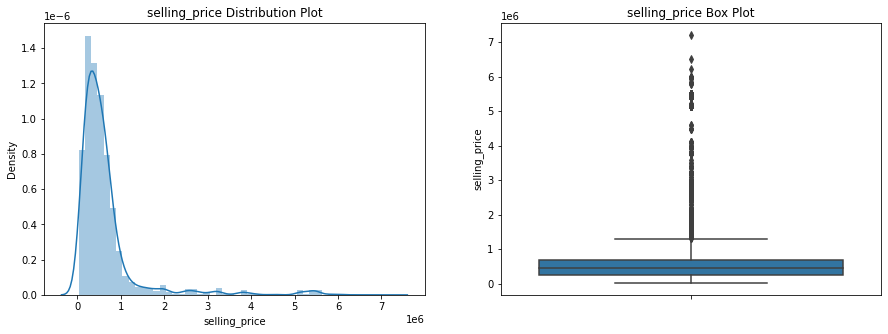

In [53]:
dist_box_plot(car_data_modified, "selling_price")

Evaluation of price averages on the basis of car brands.

In [54]:
car_data_modified['selling_price'] = car_data_modified['selling_price'].astype('int')
temp= car_data_modified.copy()
table = temp.groupby(['CompanyName'])['selling_price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [29999,299990,675000,10000000]
cars_bin=['Low','Medium','High']
car_data_modified['BrandsPriceLevels'] = pd.cut(temp['selling_price_y'],bins,right=False,labels=cars_bin)
car_data_modified.head()

,CompanyName,year,selling_price,fuel,owner,mileage,engine,max_power,seats,MileAgeLevels,BrandsPriceLevels
0,Maruti,8,450000,Diesel,First Owner,23.40,1248.0,74.00,5.0,Low,Medium
1,Skoda,8,370000,Diesel,Second Owner,21.14,1498.0,103.52,5.0,Medium,Medium
2,Honda,16,158000,Petrol,Third Owner,17.70,1497.0,78.00,5.0,Medium,Medium
3,Hyundai,12,225000,Diesel,First Owner,23.00,1396.0,90.00,5.0,Low,Medium
4,Maruti,15,130000,Petrol,First Owner,16.10,1298.0,88.20,5.0,Medium,Medium


In [55]:
del_iqr(car_data_modified,"selling_price")

with outliers: 8023
non-outliers: 7428


3.7. Bivariate analysis

Source: https://www.statisticshowto.com/bivariate-analysis/

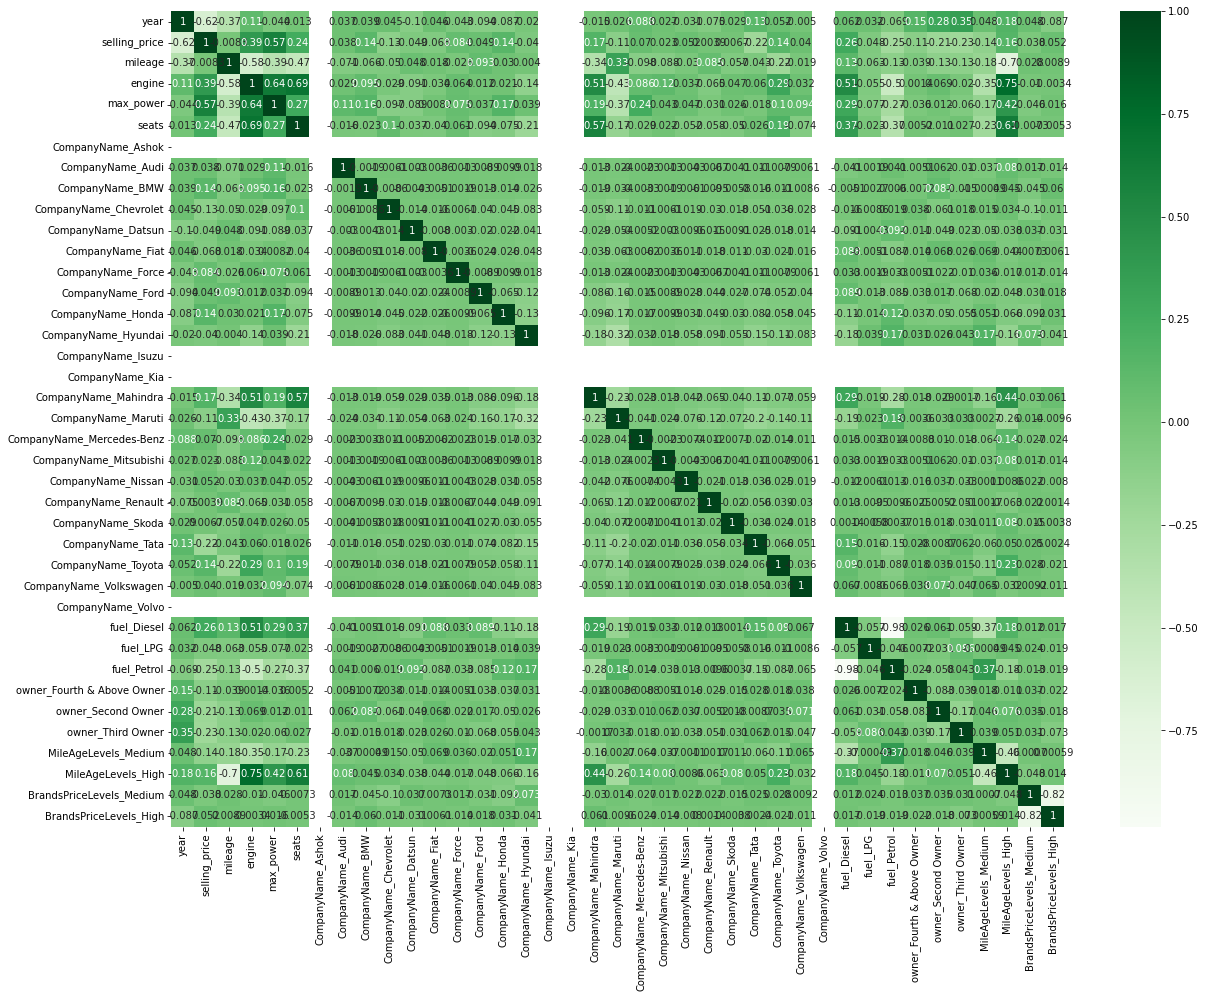

In [76]:
plt.figure(figsize = (20, 15))
sns.heatmap(car_data_modified.corr(), annot = True, cmap="Greens")
plt.show()

There is no correlation.

## 4. Categorical Data

get_dummies() is used for the categorical data.

https://www.geeksforgeeks.org/python-pandas-get_dummies-method/#:~:text=get_dummies()%20is%20used%20for,into%20dummy%20or%20indicator%20variables.

In [57]:
car_data_modified = pd.get_dummies( car_data_modified, drop_first=True)

In [58]:
car_data_modified

,year,selling_price,mileage,engine,max_power,seats,CompanyName_Ashok,CompanyName_Audi,CompanyName_BMW,CompanyName_Chevrolet,...,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner,MileAgeLevels_Medium,MileAgeLevels_High,BrandsPriceLevels_Medium,BrandsPriceLevels_High
0,8,450000,23.40,1248.0,74.00,5.0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,8,370000,21.14,1498.0,103.52,5.0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
2,16,158000,17.70,1497.0,78.00,5.0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
3,12,225000,23.00,1396.0,90.00,5.0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,15,130000,16.10,1298.0,88.20,5.0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,9,320000,18.50,1197.0,82.85,5.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8124,15,135000,16.80,1493.0,110.00,5.0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
8125,13,382000,19.30,1248.0,73.90,5.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8126,9,290000,23.57,1396.0,70.00,5.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## 5.Train-Valid-Test data

In [59]:
#n= percent of train data
def split_train_value(df, n):
    x = int(len(df)*n)
    raw_train = df.sample(x)
    df.drop(raw_train.index, inplace=True)
    raw_valid = df.sample(int(len(df)/2))
    df.drop(raw_valid.index, inplace=True)
    raw_test = df.sample(len(raw_valid))

    return raw_train, raw_valid, raw_test

In [60]:
raw_train, raw_valid, raw_test = split_train_value(car_data_modified, 0.8)

## 6.Missing Value 

In [61]:
def fix_missing(df, col, name, nan_dict, is_train):
    if is_train:
        if col.dtypes == int or col.dtypes == float:
            if pd.isnull(col).sum:
                df[name+"_na"]=pd.isnull(col)
                nan_dict[name]= col.median()
                df[name] = pd.to_numeric(col.fillna(col.median()), errors='coerce')                
    else:
        if col.dtypes  == int or col.dtypes == float:
            if name in nan_dict:
                df[name+"_na"]= pd.isnull(col)
                df[name] = pd.to_numeric(col.fillna(nan_dict[name]), errors='coerce')  
            else:
                df[name] = col.fillna(df[name].median())

In [62]:
def proc_df(df, y_fld, nan_dict=None, is_train=True):
    df=df.copy()
    y= df[y_fld].values
    df.drop(y_fld, axis=1,inplace=True)    
    
    if nan_dict is None:
        nan_dict={}
    for n, c in df.items():
        fix_missing(df, c, n, nan_dict, is_train)
        #numericalize(df, c, n)
    if is_train:        
        return df, y, nan_dict
    return df, y

6.2. Changes to the Train dataset affect the validation dataset and test dataset as well.

In [63]:
x_train, y_train, nas = proc_df(raw_train, 'selling_price', is_train=True)

In [64]:
x_valid, y_valid = proc_df(raw_valid, "selling_price", nan_dict=nas, is_train=False)

In [65]:
x_test, y_test = proc_df(raw_test, "selling_price", nan_dict=nas, is_train=False)

## 7. Model

--------------------

RMSE-Root Mean Square Error

In [66]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

Print Score

In [67]:
def print_score(m):
    print(f"RMSE of train set     : {rmse(m.predict(x_train), y_train)}")
    print(f"RMSE of validation set: {rmse(m.predict(x_valid), y_valid)}")
    print(f"RMSE of test set      : {rmse(m.predict(x_test), y_test)}")
    print(f"R^2  of train set     : {m.score(x_train, y_train)}")
    print(f"R^2  of validation set: {m.score(x_valid, y_valid)}")
    print(f"R^2  of test set      : {m.score(x_test, y_test)}")

In [68]:
def model_graph(m):
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.plot(m.predict(x_train), y_train, 'o')
    a, b = np.polyfit(m.predict(x_train), y_train, 1)
    plt.plot(m.predict(x_train), a*(m.predict(x_train)) + b)
    plt.title('predict x_train vs y_train', fontsize=15)
    plt.xlabel('x_train', fontsize=15)                       
    plt.ylabel('y_train', fontsize=15)

    plt.subplot(1,3,2)
    plt.plot(m.predict(x_valid), y_valid, 'o')
    a, b = np.polyfit(m.predict(x_valid), y_valid, 1)
    plt.plot(m.predict(x_valid), a*(m.predict(x_valid)) + b)
    plt.title('predict x_valid vs y_valid', fontsize=15)
    plt.xlabel('x_valid', fontsize=15)                       
    plt.ylabel('y_valid', fontsize=15)
    
    plt.subplot(1,3,3)
    plt.plot(m.predict(x_test), y_test, 'o')
    a, b = np.polyfit(m.predict(x_test), y_test, 1)
    plt.plot(m.predict(x_test), a*(m.predict(x_test)) + b)
    plt.title('predict x_test vs y_test', fontsize=15)
    plt.xlabel('x_test', fontsize=15)                       
    plt.ylabel('y_test', fontsize=15)


    plt.show()

------------------

7.1. Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

Wall time: 19.9 ms
RMSE of train set     : 123297.33341234141
RMSE of validation set: 124686.80016120066
RMSE of test set      : 124880.18879763679
R^2  of train set     : 0.7687891828532497
R^2  of validation set: 0.7654693195220149
R^2  of test set      : 0.7608705313337474


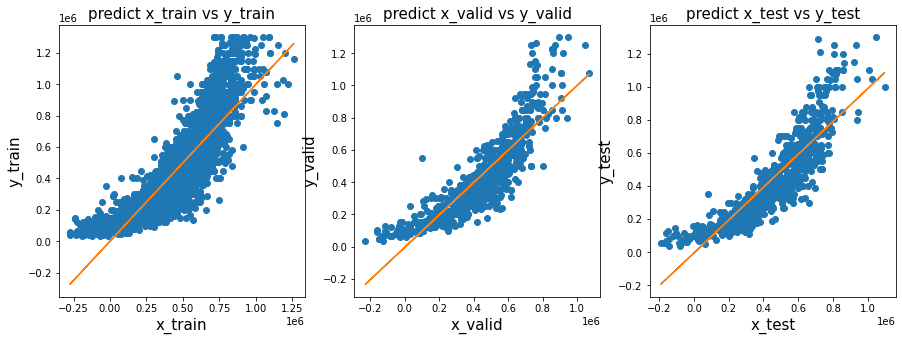

In [70]:
m = LinearRegression(n_jobs=-1)
%time m.fit(x_train, y_train)
print_score(m)
model_graph(m)

Our train, validation, and test datasets all had R2 values that were quite close. We can say that our model works well but high error (RMSE) rates might be evaluated as negative.

7.2. Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

Wall time: 54.2 ms
RMSE of train set     : 9449.34625477937
RMSE of validation set: 14086.81400586381
RMSE of test set      : 15179.852284066648
R^2  of train set     : 0.4843487041400202
R^2  of validation set: 0.11843876177658143
R^2  of test set      : 0.1117092866756393


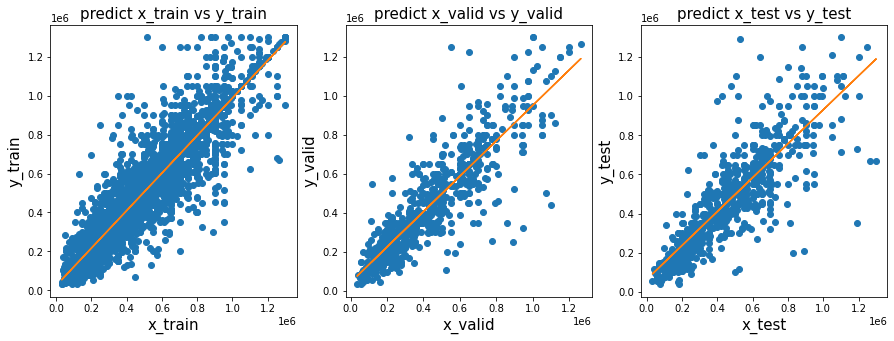

In [72]:
m = RandomForestClassifier(n_estimators=1,bootstrap=50 ,n_jobs=-1)
%time m.fit(x_train, y_train)
print_score(m)

model_graph(m)

Wall time: 1.11 s
RMSE of train set     : 7712.546344002156
RMSE of validation set: 12166.695363794153
RMSE of test set      : 11704.556172382743
R^2  of train set     : 0.647088522383036
R^2  of validation set: 0.14670255720053835
R^2  of test set      : 0.1426648721399731


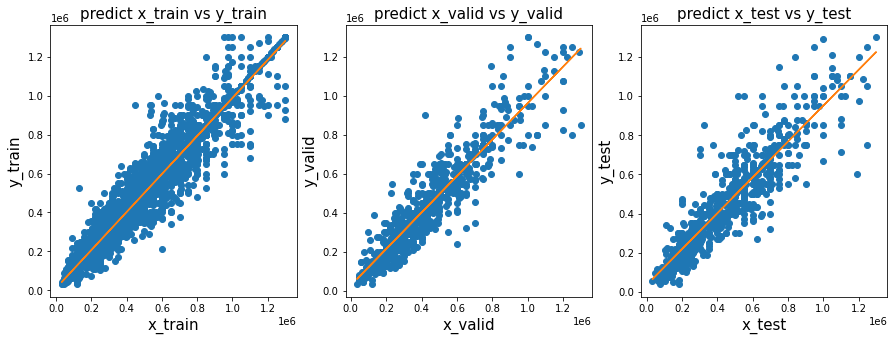

In [73]:
m = RandomForestClassifier(n_estimators=100,bootstrap=50 ,n_jobs=-1)
%time m.fit(x_train, y_train)
print_score(m)
model_graph(m)

It is not a suitable model for our dataset.

7.3. kNN (k- Nearest Neighbors)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Wall time: 21 ms
RMSE of train set     : 10768.679313438184
RMSE of validation set: 13020.657395233071
RMSE of test set      : 14275.739598097127
R^2  of train set     : 0.3317064961292494
R^2  of validation set: 0.12516823687752354
R^2  of test set      : 0.11305518169582772


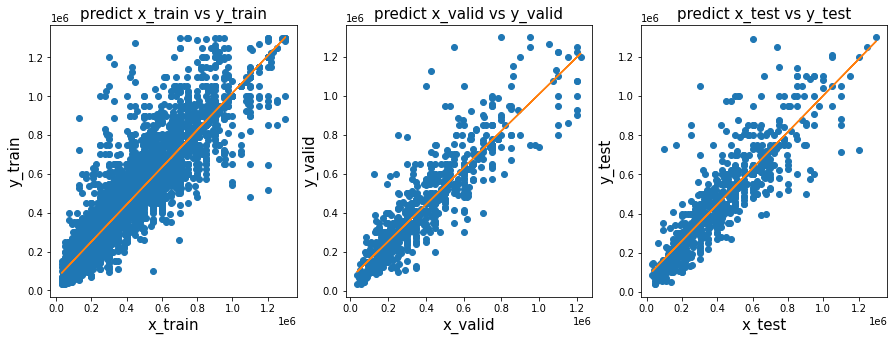

In [75]:
m = KNeighborsClassifier()
%time m.fit(x_train, y_train)
print_score(m)
model_graph(m)

It is not a suitable model for our dataset.

# Result

Trials were made on 3 different models. Changes were made on the data set to get better results. As a result of the trials, we can get the best results by using our 1st model(LinearRegression).